In [57]:
data1 <- read.csv(file="./MovementAAL/dataset/MovementAAL_RSS_1.csv",head=TRUE,sep=",")
print("Numero de linhas")
print(nrow(data1))
data1

[1] "Numero de linhas"
[1] 27


,X.RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
1,-0.90476,-0.48,0.28571,0.3
2,-0.57143,-0.32,0.14286,0.3
3,-0.38095,-0.28,-0.14286,0.35
4,-0.28571,-0.2,-0.47619,0.35
5,-0.14286,-0.2,0.14286,-0.2
6,-0.14286,-0.2,0.047619,0
7,-0.14286,-0.16,-0.38095,0.2
8,-0.14286,-0.04,-0.61905,-0.2
9,-0.095238,-0.08,0.14286,-0.55
10,-0.047619,0.04,-0.095238,0.05


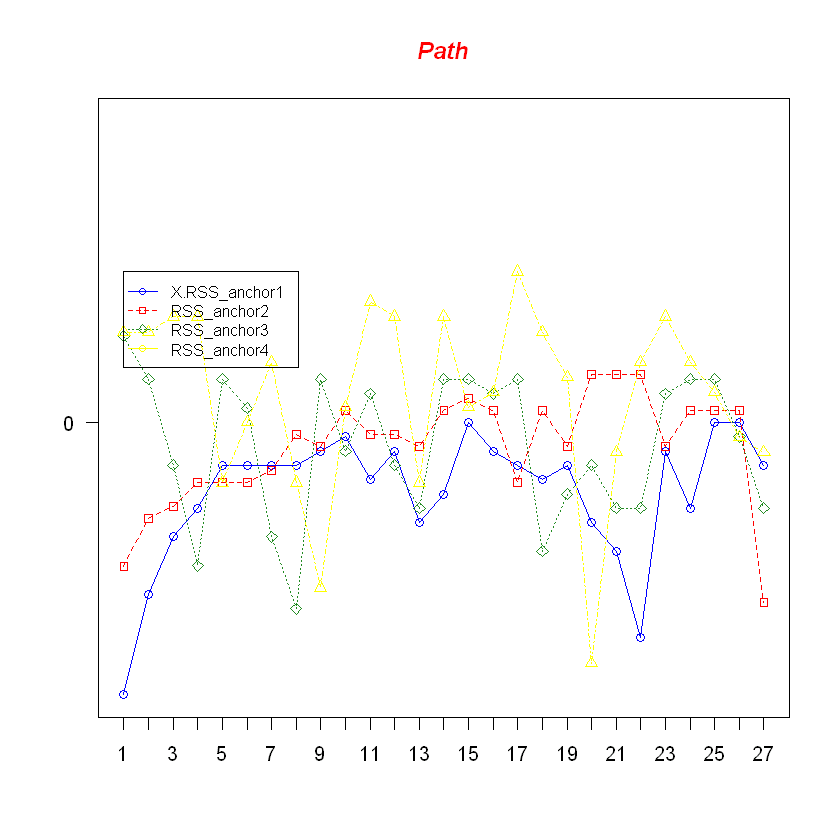

In [58]:
max_y <- max(data1)
min_y <- min(data1)
plot_colors <- c("blue","red","forestgreen","yellow")
plot(data1$X.RSS_anchor1, type="o", col=plot_colors[1], 
   ylim=c(min_y,max_y+0.5), axes=FALSE, ann=FALSE)
axis(1, at=1:27)
axis(2, las=1, at=4*0:max_y)
box()
lines(data1$RSS_anchor2, type="o", pch=22, lty=2, 
   col=plot_colors[2])
lines(data1$RSS_anchor3, type="o", pch=23, lty=3, 
   col=plot_colors[3])
lines(data1$RSS_anchor4, type="o", pch=24, lty=4, 
   col=plot_colors[4])
title(main="Path", col.main="red", font.main=4)
legend(1, max_y, names(data1), cex=0.8, col=plot_colors, 
   pch=21:23, lty=1:3);

In [59]:
groups <- read.csv(file="./MovementAAL/groups/MovementAAL_DatasetGroup.csv",head=TRUE,sep=",")
groups1 = groups[groups$dataset_ID==1, ]
groups1$dataset_ID
groups1$X.sequence_ID


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104

In [60]:
print("Numero de grupos, ou salas diferentes")
unique(groups$dataset_ID)

print("Target")

target <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")
head(target)
allDataGroup1<-list()
allDataGroup1Target<-list()
groups1 = groups[groups$dataset_ID==1, ]

index<-1
for (id in groups1$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup1[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup1Target[index]<-target[[2]][id]
    index<-index+1
}




[1] "Numero de grupos, ou salas diferentes"


[1] 1 2 3

[1] "Target"


,X.sequence_ID,class_label
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


,X.RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
1,-0.90476,-0.48,0.28571,0.3
2,-0.57143,-0.32,0.14286,0.3
3,-0.38095,-0.28,-0.14286,0.35
4,-0.28571,-0.2,-0.47619,0.35
5,-0.14286,-0.2,0.14286,-0.2
6,-0.14286,-0.2,0.047619,0


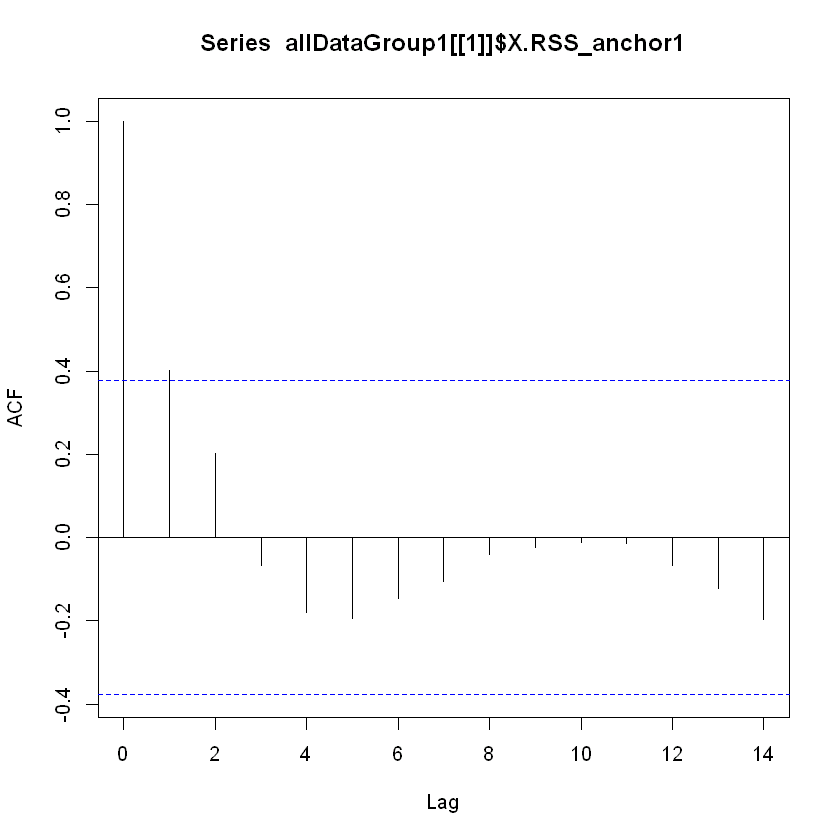

In [61]:
head(allDataGroup1[[1]])
acf(allDataGroup1[[1]]$X.RSS_anchor1)
